In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

A - Importe os dados em notebook e atribua à variável chipo.

In [53]:
chipo = pd.read_csv(url, delimiter="\t")

B - Selecione e mostre as 10 primeiras entradas.

In [54]:
chipo.head(11)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


C - Quantas observações estão presentes neste DataSet?

In [55]:
chipo.shape

(4622, 5)

In [56]:
linhas_vazias = chipo['choice_description'].isna().sum()
linhas_vazias

1246

In [57]:
quant_descricao = chipo['choice_description'].count()
quant_descricao

3376

D - Qual o número de colunas neste DataSet?

In [58]:
quant_colunas = chipo.shape[1]
quant_colunas

5

E - Qual o nome de todas as colunas deste DataSet?

In [59]:
nome_das_colunas = chipo.columns
nome_das_colunas

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

F - Qual o produto mais pedido? Quantas vezes ele foi pedido?

In [60]:
chipo_group = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)
item_mais_vendido = chipo_group.head(1)
item_mais_vendido

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

G - Qual foi o pedido mais pedido dentro da coluna choice_description?

In [61]:
chipo.pivot_table(index='choice_description', values='quantity', aggfunc='sum').reset_index().sort_values('quantity', ascending=False).head(1)

,choice_description,quantity
15,[Diet Coke],159


K - Quantos itens diferentes estão esgotados?

In [62]:
len(chipo['item_name'].unique())

50

H - Quantos itens foram pedidos no total?

In [63]:
total_items = chipo['quantity'].sum()
total_items

4972

I - Qual foi o valor recebido para o período representado nessa base de dados?

In [64]:
total_recibo = chipo['item_price'].str.slice(start=1).astype(float).sum()
total_recibo

34500.16

H - Qual a média do valor recebido por pedido?

In [65]:
media_pedido = total_recibo / total_items
media_pedido

6.938889782783589

K - Quantos itens diferentes estão esgotados?

L - Quantos produtos custam mais de $10?

In [66]:
chipo_copy = chipo
chipo_copy['item_price'] = chipo_copy['item_price'].str.slice(start=1).astype(float)

In [67]:
produtos_acima_10 = (chipo_copy['item_price'] > 10).sum()
produtos_acima_10

1130

M - Qual o preço para cada um deles?

In [68]:
chipo_copy.loc[chipo_copy['item_price'] > 10]

,order_id,quantity,item_name,choice_description,item_price
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
13,7,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
23,12,1,Chicken Burrito,"[[Tomatillo-Green Chili Salsa (Medium), Tomati...",10.98
...,...,...,...,...,...
4610,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4611,1830,1,Veggie Burrito,"[Tomatillo Green Chili Salsa, [Rice, Fajita Ve...",11.25
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75


N - Ordene os itens que custam mais de $10 por ordem alfabética.

In [69]:
chipo_copy_sort = chipo_copy.sort_values(by='item_name', ascending=True)
chipo_copy_sort.loc[chipo_copy_sort['item_price'] > 10]

,order_id,quantity,item_name,choice_description,item_price
3389,1360,2,6 Pack Soft Drink,[Diet Coke],12.98
4485,1786,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
3017,1200,1,Barbacoa Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.75
1383,562,1,Barbacoa Bowl,"[[Tomatillo-Green Chili Salsa (Medium), Roaste...",11.48
3025,1203,1,Barbacoa Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",11.75
...,...,...,...,...,...
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
4109,1646,1,Veggie Salad Bowl,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
738,304,1,Veggie Soft Tacos,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.25
3889,1559,2,Veggie Soft Tacos,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",16.98


O - Quantas vezes o item mais caro foi pedido?

In [70]:
group = chipo_copy.groupby('item_name').agg({'quantity': 'sum', 'item_price': 'max'}).sort_values(by='item_price', ascending=False)
group.head(1)

,quantity,item_price
item_name,,
Chips and Fresh Tomato Salsa,130,44.25


P - Quantas vezes uma Veggie Salad Bowl foi pedida?

In [71]:
veggie_salad = chipo_copy[chipo_copy['item_name'] == 'Veggie Salad Bowl']['quantity'].sum()
veggie_salad

18

Q - Crie um histograma com os 5 produtos mais pedidos.

In [72]:
group = chipo_copy.groupby('item_name').agg({'quantity': 'sum', 'item_price': 'max'}).sort_values(by='quantity', ascending=False)
cinco = group.head(5)

In [73]:
cinco

,quantity,item_price
item_name,,
Chicken Bowl,761,32.94
Chicken Burrito,591,35.00
Chips and Guacamole,506,17.80
Steak Burrito,386,27.75
Canned Soft Drink,351,5.00


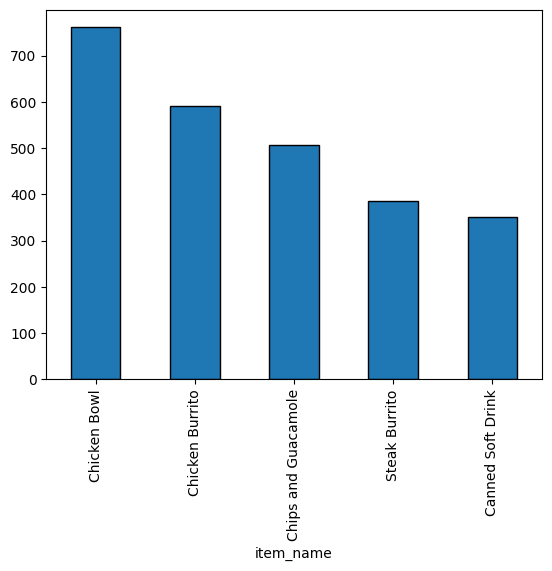

In [74]:
cinco['quantity'].plot(kind='bar', edgecolor='black')
plt.show()

R - Crie um gráfico de espalhamento onde em um eixo está o número de vezes que um pedido foi realizado e no outro eixo está o preço do produto.

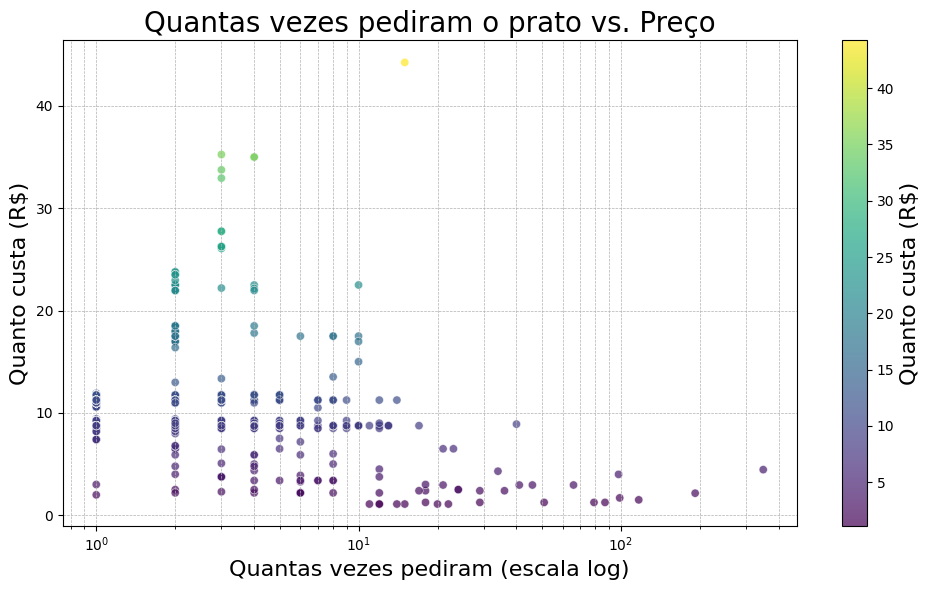

In [76]:
chipo['name_description'] = chipo['item_name'] + " " + chipo['choice_description'].fillna('')

# Criando a tabela auxiliar
table_aux = chipo.pivot_table(index=['name_description', 'item_price'], values='quantity', aggfunc='sum').reset_index().sort_values('quantity', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(table_aux['quantity'], table_aux['item_price'], 
                     c=table_aux['item_price'], cmap='viridis', alpha=0.7, edgecolors='w', linewidth=0.5)

ax.set_title('Quantas vezes pediram o prato vs. Preço', fontsize=20)
ax.set_xlabel('Quantas vezes pediram (escala log)', fontsize=16)
ax.set_ylabel('Quanto custa (R$)', fontsize=16)

ax.set_xscale('log')

cbar = plt.colorbar(scatter)
cbar.set_label('Quanto custa (R$)', fontsize=16)

ax.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()
